In [279]:
import networkx as nx
import matplotlib.pyplot as plt

# Erdos Renyi Random Graph : 

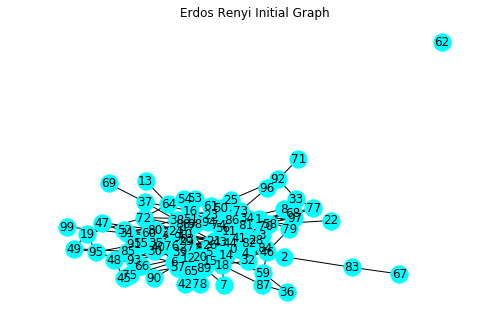

In [280]:
# Network Definition
erg = nx.erdos_renyi_graph(100,0.05)
nx.draw(erg,node_color = 'cyan',with_labels=True )
plt.title('Erdos Renyi Initial Graph')
plt.show()


In [281]:
# Model Selection
import ndlib.models.epidemics.SISModel as sis
sis_model = sis.SISModel(erg)


In [282]:
# Configurations to the Model
import ndlib.models.ModelConfig as mc

config = mc.Configuration()
config.add_model_parameter('beta', 0.00167)
config.add_model_parameter('lambda', 0.002083)
config.add_model_parameter("percentage_infected", 0.01)



In [283]:
# SIS Model intialization
sis_model.set_initial_status(config)


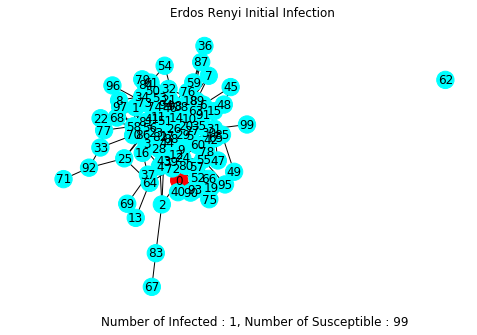

In [284]:
color_map = []
Infected = 0
Susceptible = 0
for patch in list(erg.node):
    if patch in sis_model.status:
        if sis_model.status[patch] == 1:
            color_map.append('red')
            Infected += 1
        else: 
            color_map.append('cyan')
            Susceptible += 1
            
nx.draw(erg ,node_color = color_map, with_labels = True)
plt.title('Erdos Renyi Initial Infection ')
txt="Number of Infected : " + str(Infected) + ", Number of Susceptible : " + str(Susceptible)
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

In [285]:
iterations = sis_model.iteration_bunch(500)
trends = sis_model.build_trends(iterations)

In [286]:
color_map = []
Infected= 0
Susceptible = 0
for patch in list(erg.node):
    if patch in sis_model.status:
        if sis_model.status[patch] == 1:
            color_map.append('red')
            Infected += 1
        else: 
            color_map.append('cyan')
            Susceptible +=1

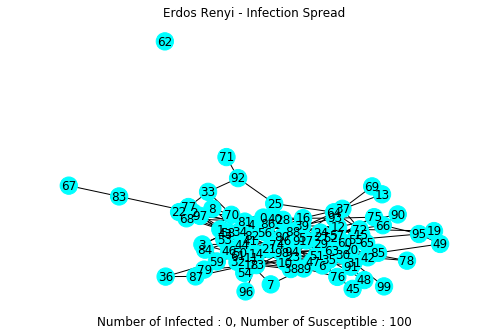

In [287]:
nx.draw(erg ,node_color = color_map, with_labels = True)
plt.title('Erdos Renyi - Infection Spread')
txt="Number of Infected : " + str(Infected) + ", Number of Susceptible : " + str(Susceptible)
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [288]:
# Diffusion Spread 
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.MultiPlot import MultiPlot

viz = DiffusionTrend(sis_model, trends)
p = viz.plot(width=400, height=400)
show(p)

# Barabashi Random Graph ( Prefential Attachment Network): 

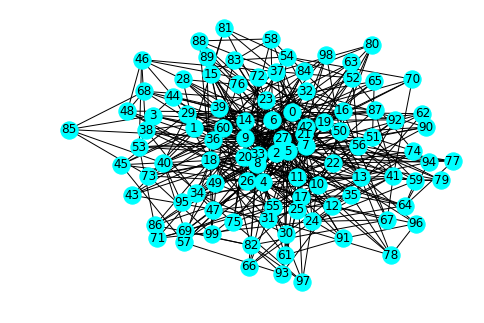

In [289]:
brg = nx.barabasi_albert_graph(100, 5)
nx.draw(brg, node_color = 'cyan', with_labels = True)

In [290]:
# Model Selection
sis_model_bag = sis.SISModel(brg)

In [291]:
# Model Configurations 
config = mc.Configuration()
config.add_model_parameter('beta', 0.00167)
config.add_model_parameter('lambda', 0.002083)
config.add_model_parameter("percentage_infected", 0.01)

In [292]:
# SIS Model intialization
sis_model_bag.set_initial_status(config)

4
18


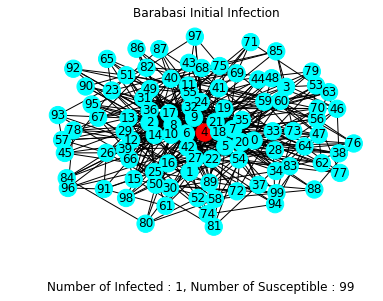

In [293]:
color_map = []
Infected = 0
Susceptible = 0
for patch in list(brg.node):
    if patch in sis_model_bag.status:
        if sis_model_bag.status[patch] == 1:
            color_map.append('red')
            Infected += 1
            deg = brg.degree[patch]
            print(patch)
            print(deg)
        else: 
            color_map.append('cyan')
            Susceptible += 1

plt.title("Barabasi Initial Infection")
txt="Number of Infected : " + str(Infected) + ", Number of Susceptible : " + str(Susceptible)
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
nx.draw(brg ,node_color = color_map, with_labels = True)

plt.show()

In [294]:
clus_coeff = nx.clustering(brg)


In [295]:
max(nx.clustering(brg), key=nx.clustering(brg).get)

89

In [296]:
clus_coeff.get(26)

0.13636363636363635

In [297]:
print(nx.average_shortest_path_length(brg))

2.2206060606060607


In [298]:
list(brg.edges(39))

[(39, 5), (39, 6), (39, 9), (39, 15), (39, 24), (39, 40), (39, 84), (39, 89)]

In [299]:
iterations = sis_model_bag.iteration_bunch(500)
trends = sis_model_bag.build_trends(iterations)

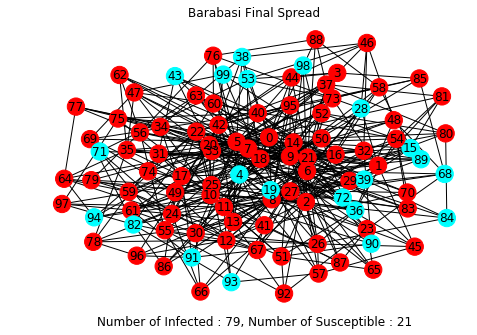

In [300]:
color_map = []
Infected = 0
Susceptible = 0
for patch in list(brg.node):
    if patch in sis_model_bag.status:
        if sis_model_bag.status[patch] == 1:
            color_map.append('red')
            Infected +=1 
        else: 
            color_map.append('cyan')
            Susceptible +=1

nx.draw(brg ,node_color = color_map, with_labels = True)
plt.title("Barabasi Final Spread")
txt="Number of Infected : " + str(Infected) + ", Number of Susceptible : " + str(Susceptible)
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [301]:
sis_model_bag.status[51]

1

In [302]:
# Diffusion Spread 
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.MultiPlot import MultiPlot

viz = DiffusionTrend(sis_model_bag, trends)
show(viz.plot(width=400, height=400))
#show(p)

# Small World Network (Watts Strogatz Model)

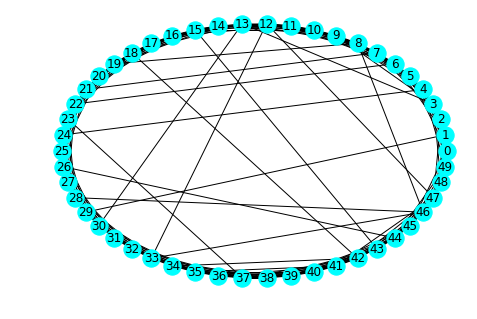

In [303]:
watts_strogatz = nx.watts_strogatz_graph(50,10,0.1)
nx.draw_circular(watts_strogatz,node_color = 'cyan',with_labels=True, seed = 543)
plt.show()

C:\Users\Hitesh_Bahar\Anaconda3\envs\python36\lib\site-packages\ndlib\models\DiffusionModel.py:161: UserWarning: Graph with less than 100 nodes: a single node will be set as infected
  warnings.warn('Graph with less than 100 nodes: a single node will be set as infected')


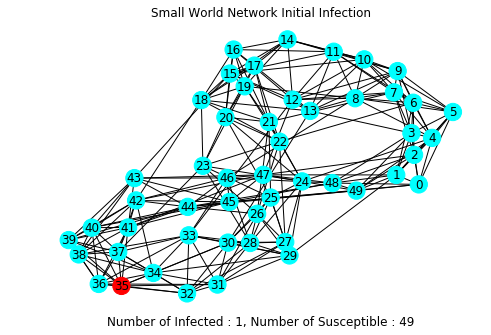

In [304]:
# Model Selection
sis_model_sw = sis.SISModel(watts_strogatz)
# Model Configurations 
config = mc.Configuration()
config.add_model_parameter('beta', 0.00167)
config.add_model_parameter('lambda', 0.002083)
config.add_model_parameter("percentage_infected", 0.01)

# SIS Model intialization
sis_model_sw.set_initial_status(config)

color_map = []
Infected = 0 
Susceptible = 0
for patch in list(watts_strogatz.node):
    if patch in sis_model_sw.status:
        if sis_model_sw.status[patch] == 1:
            Infected +=1
            color_map.append('red')
        else: 
            color_map.append('cyan')
            Susceptible +=1
            
nx.draw(watts_strogatz ,node_color = color_map, with_labels = True)
plt.title("Small World Network Initial Infection")
txt="Number of Infected : " + str(Infected) + ", Number of Susceptible : " + str(Susceptible)
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [305]:
iterations = sis_model_sw.iteration_bunch(500)
trends = sis_model_sw.build_trends(iterations)

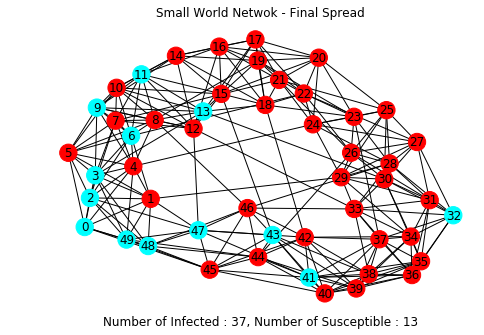

In [306]:
color_map = []
Infected = 0
Susceptible = 0
for patch in list(watts_strogatz.node):
    if patch in sis_model_sw.status:
        if sis_model_sw.status[patch] == 1:
            Infected += 1
            color_map.append('red')
        else: 
            color_map.append('cyan')
            Susceptible +=1

nx.draw(watts_strogatz ,node_color = color_map, with_labels = True)
plt.title("Small World Netwok - Final Spread")
txt="Number of Infected : " + str(Infected) + ", Number of Susceptible : " + str(Susceptible)
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [307]:
# Diffusion Spread 
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.MultiPlot import MultiPlot

viz = DiffusionTrend(sis_model_sw, trends)
show(viz.plot(width=400, height=400))
#show(p)

# Exploring Graph properties.

### Degree Distribution: 

In [308]:
import collections
def degreeDistribution(Graph, graphName):
    degree_sequence = sorted([d for n, d in Graph.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    title = "Degree Histogram - " + graphName
    plt.title(title)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

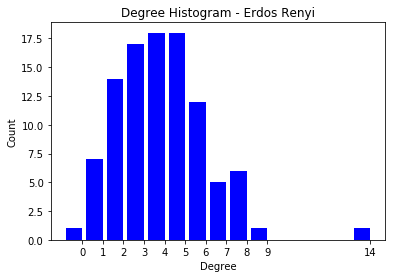

In [309]:
degreeDistribution(erg, "Erdos Renyi")

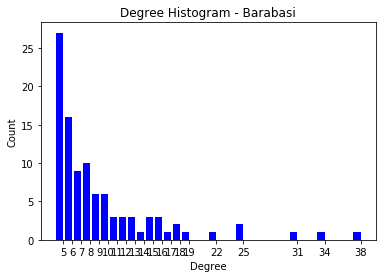

In [310]:
degreeDistribution(brg, "Barabasi")

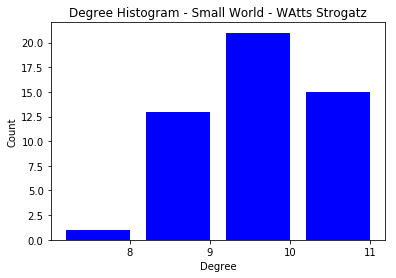

In [311]:
degreeDistribution(watts_strogatz, "Small World - WAtts Strogatz")

### Clustering Coefficient, Average Path Length, No of Nodes, No of Edges:

In [312]:
def Gproperties(Graph):
    # Calculating Clustering Coefficient
    clus_coeff = nx.clustering(Graph)
    clus_coeff_Node = max(nx.clustering(Graph), key=nx.clustering(Graph).get)
    clus_coeff_Value = clus_coeff.get(clus_coeff_Node)
    # Calculating No. of Nodes
    noOfNode = Graph.number_of_nodes()
    # Calculating No. of Edges
    noOfEdges = Graph.number_of_edges()
    # Avergae path Length
    avgPathLength = nx.average_shortest_path_length(Graph)
    
    return clus_coeff_Node,clus_coeff_Value,noOfNode,noOfEdges,avgPathLength
    

In [313]:
x_erg,y_erg,z_erg,a_erg,b_erg = Gproperties(erg)
x_brg,y_brg,z_brg,a_brg,b_brg = Gproperties(brg)
x_sw,y_sw,z_sw,a_sw,b_sw = Gproperties(watts_strogatz)


NetworkXError: Graph is not connected.

In [314]:
clus_coeff_Node_list  = [x_erg,x_brg,x_sw]
clus_ceff_Value_list = [y_erg,y_brg,y_sw]
noOfNode_list = [z_erg,z_brg,z_sw]
noOfEdges_list = [a_erg,a_brg,a_sw]
avgPathLength_list = [b_erg,b_brg,b_sw]
Graphs = ["Erdos Renyi","Barabasi","Small World"]

In [277]:
report_dict = [
    ('Network', Graphs),
    ('Number of nodes', noOfNode_list),
    ('Number of edges', noOfEdges_list),
    ('Average Path Length', avgPathLength_list),
    ('Global Clustering Coefficient Node', clus_coeff_Node_list),
    ('Global Clustering Coefficient Value', clus_ceff_Value_list),
]

In [278]:
pd.DataFrame.from_items(report_dict)

C:\Users\Hitesh_Bahar\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Network,Number of nodes,Number of edges,Average Path Length,Global Clustering Coefficient Node,Global Clustering Coefficient Value
0,Erdos Renyi,100,231,3.213333,69,1.000000
1,Barabasi,100,475,2.226465,56,0.533333
2,Small World,50,250,2.177959,41,0.678571
